In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
!pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [93]:
surya = pd.read_csv('my_movies.csv')
surya

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [94]:
surya.shape

(10, 15)

In [95]:
surya=surya.iloc[:,5:]

In [96]:
surya.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [97]:
surya.tail()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [98]:
surya.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [99]:
surya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [100]:
surya.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
surya

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [102]:
# 10% supprt & 70% confidence
surya_freq_items = apriori(surya,min_support=0.10)
surya_freq_items

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
5,0.2,(5)
6,0.1,(6)
7,0.1,(7)
8,0.1,(8)
9,0.2,(9)


In [103]:
deva = association_rules(surya_freq_items,metric='lift',min_threshold=0.65)
deva

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(0),(2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(0),(3),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
...,...,...,...,...,...,...,...,...,...,...
245,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
246,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [104]:
deva.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
212,"(9, 5)","(2, 3)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
106,"(1, 9)",(7),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
213,"(2, 3)","(9, 5)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
210,"(9, 2)","(3, 5)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
136,"(0, 1, 9)",(7),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [105]:
deva[deva.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(0),(7),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
245,(0),"(9, 2, 3, 5)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
246,(2),"(0, 9, 3, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(3),"(0, 9, 2, 5)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(5),"(0, 9, 2, 3)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


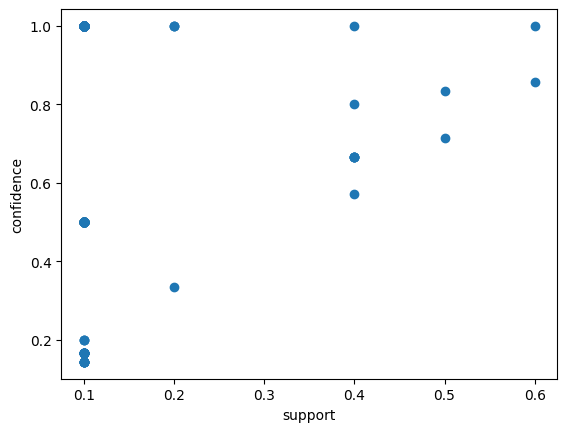

In [106]:
plt.scatter(deva['support'],deva['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [107]:
#support = 18% & confidence = 85%
surya_freq_items2 = apriori(surya,min_support=0.18)
surya_freq_items2

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
5,0.2,(5)
6,0.2,(9)
7,0.5,"(0, 1)"
8,0.4,"(0, 4)"
9,0.2,"(0, 9)"


In [108]:
deva_rules2 = association_rules(surya_freq_items2,metric='lift',min_threshold=0.85)
deva_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(0),(9),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(9),(0),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(1),(4),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(4),(1),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(2),(5),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(5),(2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [109]:
deva_rules2[deva_rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(0),(9),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(9),(0),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(1),(4),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(4),(1),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(2),(5),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(5),(2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


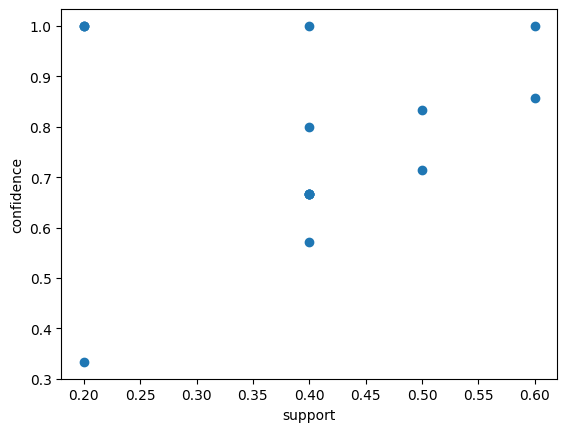

In [110]:
plt.scatter(deva_rules2['support'],deva_rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [111]:
# support = 26% & Confidence =95%
surya_freq_items3 = apriori(surya,min_support=0.25)
surya_freq_items3

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.6,(4)
3,0.5,"(0, 1)"
4,0.4,"(0, 4)"
5,0.6,"(1, 4)"
6,0.4,"(0, 1, 4)"


In [112]:
deva_rules3 = association_rules(surya_freq_items3,metric = 'lift',min_threshold=0.95)
deva_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(1),(4),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(4),(1),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(0, 1)",(4),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
7,"(0, 4)",(1),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
8,"(1, 4)",(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
9,(0),"(1, 4)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


In [113]:
deva_rules3[deva_rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(4),(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(1),(4),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(4),(1),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,"(0, 1)",(4),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
7,"(0, 4)",(1),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
8,"(1, 4)",(0),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
9,(0),"(1, 4)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


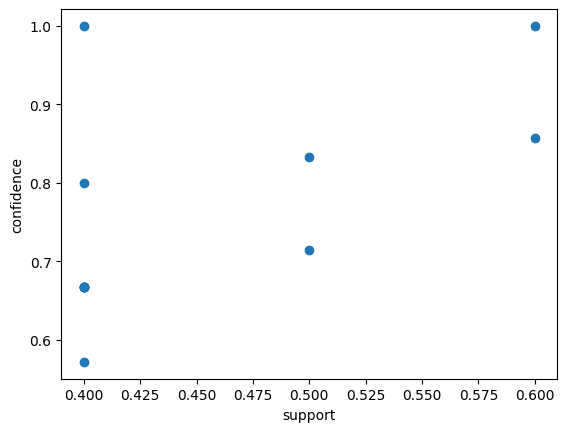

In [114]:
plt.scatter(deva_rules3['support'],deva_rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()